<a href="https://colab.research.google.com/github/Teganmosi/CIFAR-10-Image-Classification/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 as cf10

In [4]:
(train_images, train_labels), (test_images, test_labels)= cf10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
# 1. Function for showing images
def show_images(train_images,
                class_names,
                train_labels,
                nb_samples = 12, nb_row = 4):

    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

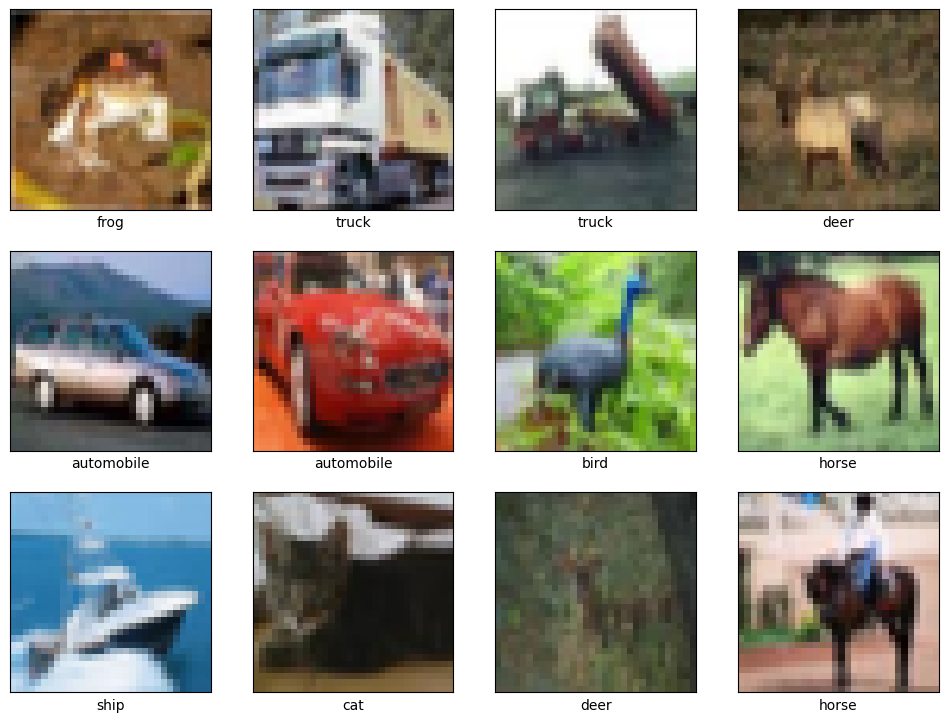

In [6]:
# Visualize some sample images from the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
show_images(train_images, class_names, train_labels)

In [7]:
#Data normalization
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

#one-hot encode the labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [10]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 30

METRICS = metrics=['accuracy',
                   Precision(name='precision'),
                   Recall(name='recall')]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels,
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 21s 6ms/step - loss: 1.4097 - accuracy: 0.4931 - precision: 0.7220 - recall: 0.2765 - val_loss: 1.1537 - val_accuracy: 0.5906 - val_precision: 0.7351 - val_recall: 0.4154
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0658 - accuracy: 0.6259 - precision: 0.7661 - recall: 0.4805 - val_loss: 1.0212 - val_accuracy: 0.6447 - val_precision: 0.7703 - val_recall: 0.4957
Epoch 3/30
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9233 - accuracy: 0.6772 - precision: 0.7907 - recall: 0.5635 - val_loss: 0.9467 - val_accuracy: 0.6737 - val_precision: 0.7717 - val_recall: 0.5725
Epoch 4/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8250 - accuracy: 0.7129 - precision: 0.8100 - recall: 0.6187 - val_loss: 0.9294 - val_accuracy: 0.6762 - val_precision: 0.7825 - val_recall: 0.5719
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7427 - accuracy: 

In [11]:
#Evaluate the model
import matplotlib.pyplot as plt

def show_performance_curve(training_result, metric, metric_label):

    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]
    intersection_idx = np.argwhere(np.isclose(train_perf,
                                                validation_perf, atol=1e-2)).flatten()[0]
    intersection_value = train_perf[intersection_idx]

    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label = 'val_'+str(metric))
    plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')

    plt.annotate(f'Optimal Value: {intersection_value:.4f}',
             xy=(intersection_idx, intersection_value),
             xycoords='data',
             fontsize=10,
             color='green')

    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')

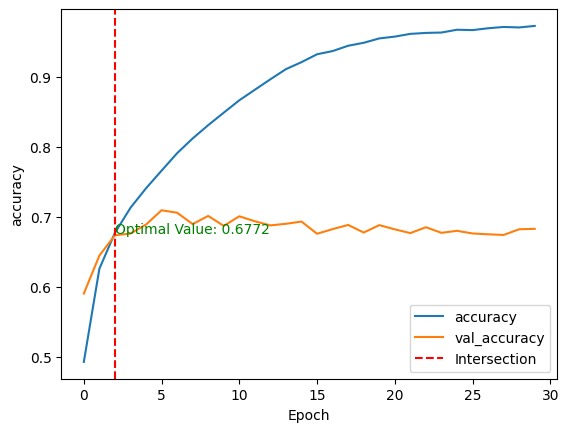

In [12]:
#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
show_performance_curve(training_history, 'accuracy', 'accuracy')

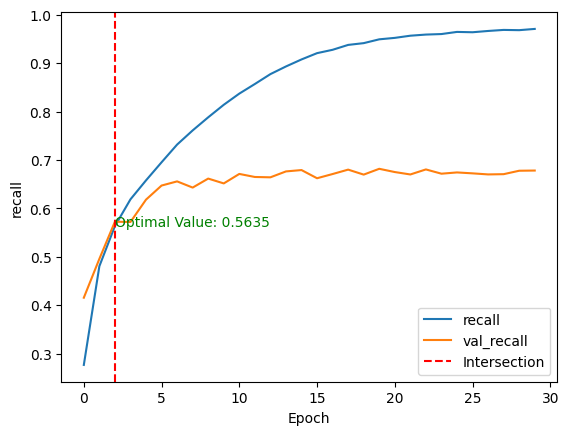

In [13]:
show_performance_curve(training_history, 'recall', 'recall')

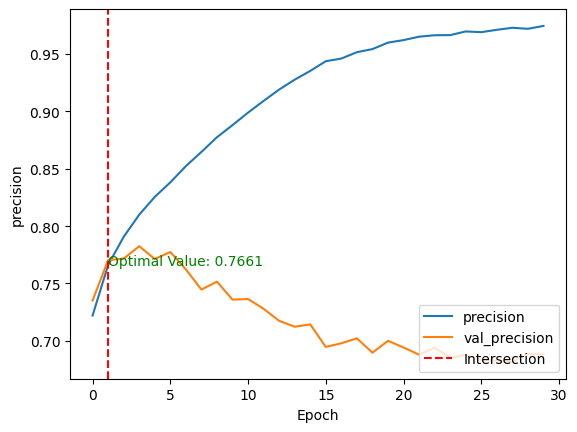

In [14]:
show_performance_curve(training_history, 'precision', 'precision')

313/313 [==============================] - 1s 2ms/step


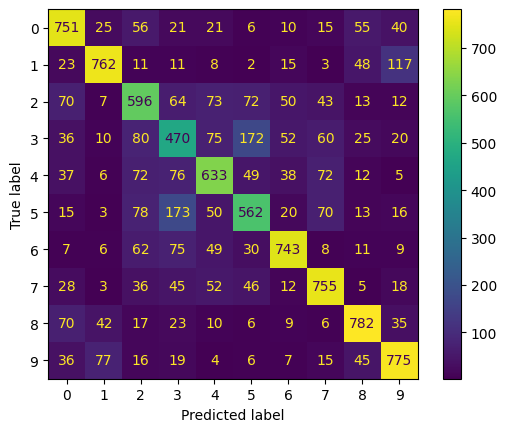

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtain the model's predictions on the test dataset
test_predictions = model.predict(test_images)

# Convert predictions from probabilities to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert one-hot encoded true labels back to class labels
test_true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Create a ConfusionMatrixDisplay instance
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()